In [1]:
import requests
from bs4 import BeautifulSoup
import json

In [2]:
import time

In [ ]:
# Wall time
# Record the start time (wall time)
start_time_wall = time.time()
end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")


# CPU time
# Record the start time (total execution time)
start_time_cpu = time.process_time()
end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")


# 1. Scraping

## 1.1 starting code wall and CPU time

In [10]:
start_time_wall = time.time()
start_time_cpu = time.process_time()

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

faqs = []

for url in urls:
    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')

    blocks = soup.find_all('details', class_= 'expandable singleton')
    for b in blocks:
        question = b.find('summary', class_='expandable-item-title').text.strip()
        answers_paragraphs = b.find_all('p')
        answer_text = ''
        for p in answers_paragraphs:
            for a in p.find_all('a'):
                if 'href' in a.attrs:
                    link_text = a.text
                    link_url = a['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    a.replace_with(markdown_link)
            text_with_markdown_links = ''.join([str(x) for x in p.contents]).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '
        
        # print(f"question: {question}")
        # print(f"answer: {answer_text}")
        faqs.append({'question': question, 'answer': answer_text})

faqs_json = json.dumps(faqs, indent=4)

with open('faqs.json', 'w') as file:
    file.write(faqs_json)
    
    
end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.4f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.4f} seconds")

Elapsed Wall Time: 8.2585 seconds
Elapsed CPU Time: 1.1875 seconds


## 1.2 starting code line_profiler

In [7]:
%load_ext line_profiler

In [8]:
from line_profiler import LineProfiler

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

faqs = []


def process_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    blocks = soup.find_all('details', class_='expandable singleton')
    for b in blocks:
        question = b.find('summary', class_='expandable-item-title').text.strip()
        answers_paragraphs = b.find_all('p')
        answer_text = ''
        for p in answers_paragraphs:
            for a in p.find_all('a'):
                if 'href' in a.attrs:
                    link_text = a.text
                    link_url = a['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    a.replace_with(markdown_link)
            text_with_markdown_links = ''.join([str(x) for x in p.contents]).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '
        
        faqs.append({'question': question, 'answer': answer_text})

profiler = LineProfiler()
profiler.add_function(process_url)

# Profile the execution of each URL
for url in urls:
    profiler.runcall(process_url, url)

profiler.print_stats()

Timer unit: 1e-07 s

Total time: 12.0148 s
File: C:\Users\jrgel\AppData\Local\Temp\ipykernel_64684\1189601546.py
Function: process_url at line 17

Line #      Hits         Time  Per Hit   % Time  Line Contents
    17                                           def process_url(url):
    18         8   71204791.0    9e+06     59.3      response = requests.get(url)
    19         8   42831364.0    5e+06     35.6      soup = BeautifulSoup(response.text, 'html.parser')
    20                                               
    21         8    4587114.0 573389.2      3.8      blocks = soup.find_all('details', class_='expandable singleton')
    22       184       1907.0     10.4      0.0      for b in blocks:
    23       176     419125.0   2381.4      0.3          question = b.find('summary', class_='expandable-item-title').text.strip()
    24       176     348321.0   1979.1      0.3          answers_paragraphs = b.find_all('p')
    25       176       4248.0     24.1      0.0          answer_te

## 1.3 multi processing

In [5]:
from multiprocessing import Pool, cpu_count

In [6]:
cpu_count()

20

In [ ]:
start_time_wall = time.time()
start_time_cpu = time.process_time()

def scrape_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    faq_items = []
    blocks = soup.find_all('details', class_='expandable singleton')
    for block in blocks:
        question = block.find('summary', class_='expandable-item-title').text.strip()
        answer_paragraphs = block.find_all('p')
        answer_text = ''
        for paragraph in answer_paragraphs:
            for link in paragraph.find_all('a'):
                if 'href' in link.attrs:
                    link_text = link.text
                    link_url = link['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    link.replace_with(markdown_link)
            text_with_markdown_links = ''.join(str(content) for content in paragraph.contents).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '
        faq_items.append({'question': question, 'answer': answer_text})
    
    return faq_items

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

# Create a Pool of worker processes
#pool = Pool()
num_processes = cpu_count()  # Use all available CPU cores
pool = Pool(processes=num_processes) 

# Use multiprocessing to scrape URLs in parallel
results = pool.map(scrape_url, urls)

# Flatten the list of results
faqs = [item for sublist in results for item in sublist]

# Convert FAQs to JSON format
faqs_json = json.dumps(faqs, indent=4)

# Write FAQs to a JSON file
with open('faqs.json', 'w') as file:
    file.write(faqs_json)

# Close the pool of worker processes
pool.close()
pool.join()

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

## 1.4 multi threading

In [4]:
import threading

start_time_wall = time.time()
start_time_cpu = time.process_time()

urls = [
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/short-term-international-student-FAQ.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/Emergencyinformation.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/curricular-practical-training/cpt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/optional-practical-training/opt-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/alumni/extend-your-opt/stem-opt/FAQs-on-the-new-regulations-for-STEM-OPT.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/employment-and-tax/tax/tax-frequently-asked-questions.html",
    "https://www.nyu.edu/students/student-information-and-resources/student-visa-and-immigration/current-students/visa-and-academic-changes/effect-of-arrest-on-immigration-status.html"
]

faqs = []

def process_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    blocks = soup.find_all('details', class_='expandable singleton')
    for b in blocks:
        question = b.find('summary', class_='expandable-item-title').text.strip()
        answers_paragraphs = b.find_all('p')
        answer_text = ''
        for p in answers_paragraphs:
            for a in p.find_all('a'):
                if 'href' in a.attrs:
                    link_text = a.text
                    link_url = a['href']
                    markdown_link = f"[{link_text}](https://www.nyu.edu{link_url})" if not link_url.startswith('http') else f"[{link_text}]({link_url})"
                    a.replace_with(markdown_link)
            text_with_markdown_links = ''.join([str(x) for x in p.contents]).replace('<br/>', '\n').strip()
            answer_text += text_with_markdown_links + ' '
        
        # Append the FAQ to the list (thread-safe operation)
        faqs.append({'question': question, 'answer': answer_text})

# Create thread objects for each URL
threads = []
for url in urls:
    thread = threading.Thread(target=process_url, args=(url,))
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

# Serialize FAQs to JSON
faqs_json = json.dumps(faqs, indent=4)

# Write FAQs to a file
with open('faqs.json', 'w') as file:
    file.write(faqs_json)

# Calculate and print elapsed time
end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")


Elapsed Wall Time: 2.965152 seconds
Elapsed CPU Time: 8.500000 seconds


# 2. statistics of word counting

In [14]:
# Load JSON data from faqs.json
with open('faqs.json', 'r') as file:
    faqs = json.load(file)

In [ ]:
import re
from line_profiler import LineProfiler

## 2.1 starting code

In [36]:
def extract_sentences(text):
    # Use regex to split text into sentences
    sentences = re.split(r'[.!?]', text)
    # Filter out empty sentences
    sentences = [s.strip() for s in sentences if s.strip()]
    return sentences
def word_count(sentence):
    # Split sentence into words and count them
    words = sentence.split()
    return len(words)

start_time_wall = time.time()
start_time_cpu = time.process_time()

# Iterate over each FAQ item and extract sentences
sentences = []

for faq in faqs:
    question_sentences = extract_sentences(faq['question'])
    answer_sentences = extract_sentences(faq['answer'])
    sentences.extend(question_sentences)
    sentences.extend(answer_sentences)
# Calculate word count for each sentence
sentence_word_counts = [(sentence, word_count(sentence)) for sentence in sentences]

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")
end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

Elapsed Wall Time: 0.003748 seconds
Elapsed CPU Time: 0.000000 seconds


In [16]:
# Print or process the word counts
for sentence, count in sentence_word_counts:
    print(f"Sentence: '{sentence}'")
    print(f"Word Count: {count}")
    print("---")

Sentence: 'What is an I-20/DS-2019'
Word Count: 4
---
Sentence: 'The [I-20 (for F-1 students)/DS-2019 (for J-1 students)](https://www'
Word Count: 8
---
Sentence: 'nyu'
Word Count: 1
---
Sentence: 'edu/students/student-information-and-resources/student-visa-and-immigration/newly-admitted/before-you-arrive/get-a-us-visa/apply-for-an-i20-or-ds2019'
Word Count: 1
---
Sentence: 'html) is the document you need from NYU in order to apply for the F-1 or J-1 student visa at a U'
Word Count: 22
---
Sentence: 'S'
Word Count: 1
---
Sentence: 'consulate outside the US'
Word Count: 4
---
Sentence: 'You also need to present your I-20 or DS-2019 at the US border along with your F-1 or J-1 visa (except for Canadian citizens who only need an I-20/DS-2019 but do not need to apply for a visa), and other supporting documents in order to be able to enter the US as an F-1 or J-1 student'
Word Count: 57
---
Sentence: 'When should I apply for the I-20/DS-2019'
Word Count: 7
---
Sentence: 'Submit your applicat

## 2.2 concurrent execution

In [19]:
import os
os.cpu_count() # number of worker threads

20

In [37]:
import concurrent.futures

start_time_wall = time.time()
start_time_cpu = time.process_time()

# Function to process FAQ item and extract sentences
def process_faq(faq):
    question_sentences = extract_sentences(faq['question'])
    answer_sentences = extract_sentences(faq['answer'])
    return question_sentences + answer_sentences

# Use ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Submit tasks for each FAQ item and collect results
    all_sentences = executor.map(process_faq, faqs)

# Flatten the list of sentences
sentences = [sentence for sublist in all_sentences for sentence in sublist]

# Calculate word count for each sentence in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    sentence_word_counts = list(executor.map(word_count, sentences))

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

Elapsed Wall Time: 0.136466 seconds
Elapsed CPU Time: 0.015625 seconds


## 2.3 JIT and Numba

In [39]:
import numba as nb

start_time_wall = time.time()
start_time_cpu = time.process_time()

@nb.jit
def word_count(sentence):
    # Split sentence into words and count them
    words = sentence.split()
    return len(words)

# Iterate over each FAQ item and extract sentences
sentences = []

for faq in faqs:
    question_sentences = extract_sentences(faq['question'])
    answer_sentences = extract_sentences(faq['answer'])
    sentences.extend(question_sentences)
    sentences.extend(answer_sentences)

# Calculate word count for each sentence
sentence_word_counts = [(sentence, word_count(sentence)) for sentence in sentences]

end_time_wall = time.time()
elapsed_wall_time = end_time_wall - start_time_wall
print(f"Elapsed Wall Time: {elapsed_wall_time:.6f} seconds")

end_time_cpu = time.process_time()
elapsed_cpu_time = end_time_cpu - start_time_cpu
print(f"Elapsed CPU Time: {elapsed_cpu_time:.6f} seconds")

C:\Users\jrgel\AppData\Local\Temp\ipykernel_64684\4231837620.py:6: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Elapsed Wall Time: 0.676723 seconds
Elapsed CPU Time: 0.250000 seconds


## 2.4 Plotting the distribution graph

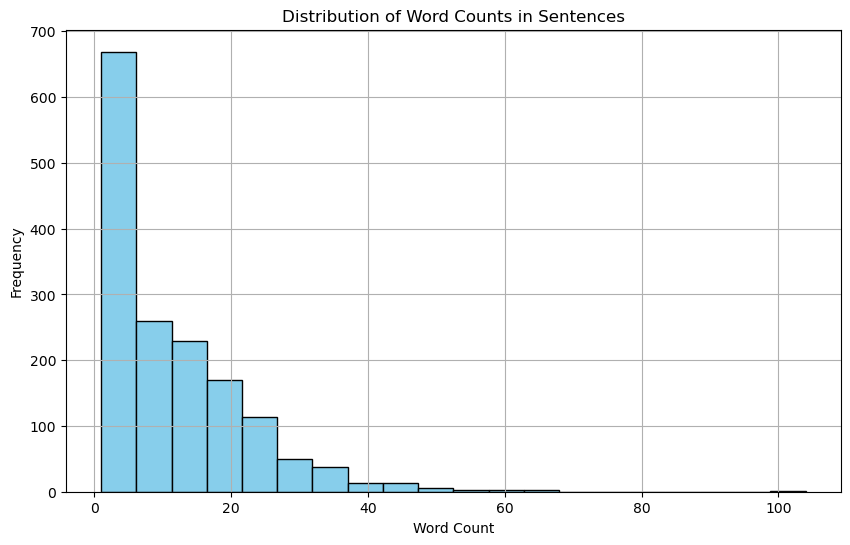

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(sentence_word_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Sentences')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()